# Analysis of Algorithms Individual Project 4 #

### By Lorenz Madarang ###

#### Prompt ####
Your algorithms group has been tasked with creating an app that performs special operations on images. Specifically, your app will compare one black-and-white image into another black-and-white image. There are a number of methods that can be used to perform this task, but your group has agreed that using dynamic programming is a fast and elegant scheme to solve this problem.

Design an algorithm (using pseudocode) that takes in as an input, two 2-D int arrays that are assumed to be 2 black-and-white images: initialImage x, whose dimensions are IxJ, and finalImage y, whose dimensions are IxK. The algorithm will compare x to the y, row-by-row, as defined below. Your algorithm will employ a dynamic programming scheme to compare X to Y identifying the minimal difference between each row.

Because you are working with black-and-white images only, you should assume that each image is a 2-D int array consisting of 2 possible values: 0 or 1, where 0 represents black and 1 represents white. Thus, this 2-D grid of 0 and 1 values comprise a 2-D black-and-white image. Each row of this image is then simply a 1-D int array filled with either 0s or 1s. Therefore, you must define how you will measure the difference between the strings of 0s and 1s in each row.

#### Part 1 ####
Design pseudocode for the image comparison algorithm discussed above, given input Images X, Y, and thresh. The output is a declaration: The images are similar, or The images are different.

#### Part 2 ####
Discuss the optimality of the dynamic programming solution. Discuss the time complexity of this algorithm in terms of the size of the inputs X and Y.

## Part 1 : Pseudocode for Image Compare ##

__Assumption__: The image arrays are of the same shape and dimension

//The algorithm takes in two image arrays and a threshold score of similarity.  The algorithm compares the image array rows and calculates the difference between the rows.  A distance matrix is created with the row differences.  The total difference is calculated by adding the row differences when the same row index was being compared between the two image arrays.  If the total difference is above the threshold score of similarity then the algorithm outputs 'not similar,' otherwise the algorithm will output 'similar.'

//__Input__: Two image arrays of the same dimension and a threshold score

//__Output__: Algorithm will output 'not similar' if they are different and 'similar' if they are similar

__Image Compare Function__ (array1, array2, score):

    //Create empty matrix that has the number of rows of array1 by number of rows of array1
    distance_matrix <-- empty_matrix(array1_rows by array1_rows)
    
    //Create an empty list that will hold the differences of the comparison between the same row index
    total_diff <-- empty list
    
    //Iterate through all rows of array1 and array2
    for i in range(0, array1_rows):
        for j in range(0, array2_rows):
            
            //Calculate the difference between the rows, sum it, and return absolute value
            row_diff <-- absolute_value(sum(array1[row i] - array2[row j])
            
            //Append row difference to distance matrix, fill matrix from left to right across the row, and then down
            distance_matrix[i,j] <-- row_diff
            
            //If the comparison is between the same row index append to the total difference list
            if i == j:
                append row_diff to total_diff
                
    //If the sum of the total differences list is greater than the threshold score return 'not similar'            
    if sum(total_diff) >= score:
        decision = 'not similar'
    else:
        decision = 'similar'
    return decision 

### Python Code Implementation ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [2]:
np.random.randint(0,1)

0

In [3]:
array1 = np.array([[np.random.randint(0,2)]*5, [np.random.randint(0,2)] * 5, [np.random.randint(0,2)] * 5])

In [4]:
array2 = np.array([[np.random.randint(0,2)]*5, [np.random.randint(0,2)] * 5, [np.random.randint(0,2)] * 5])

In [5]:
def img_compare(array1,array2,threshold):
    distance_matrix = np.array([[None]*array1.shape[0]]*array1.shape[0])
    total_diff = []
    for i in range(0, array1.shape[0]):
        for j in range(0, array2.shape[0]):
            row_diff = abs(np.sum(array1[i,:] - array2[j,:]))
            distance_matrix[i,j] = row_diff
            if i == j:
                total_diff.append(row_diff)
    if sum(total_diff) >= threshold:
        decision = 'not similar'
    else:
        decision = 'similar'
    return distance_matrix, decision


#### Comparison of different images ####

In [6]:
img_compare(array1,array2,5)

(array([[5, 5, 0],
        [0, 0, 5],
        [5, 5, 0]], dtype=object), 'not similar')

In [7]:
array1

array([[1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1]])

In [8]:
array2

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1]])

#### Comparison of similar images ####

In [9]:
array3 = np.array([[0]*5, [1]*5, [1] *5])

In [10]:
array4 = np.array([[0]*5, [1]*5, [1] *5])

In [11]:
img_compare(array3, array4, 5)

(array([[0, 5, 5],
        [5, 0, 0],
        [5, 0, 0]], dtype=object), 'similar')

In [12]:
array3

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [13]:
array4

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

## Part 2: Optimality and Time Complexity Analysis ##

#### Optimality ####
According to the Principle of Optimality, a problem qualifies for a dynamic programming solution if the “…the sub-solutions of an optimal solution of the problem are themselves optimal solutions for their sub-problems” (George Washington University, n.d.).  In the problem of comparing two image arrays, we can break down the image arrays into sub-problems.  This is done by breaking down the comparison of the overall image arrays into a comparison of the array rows.  

#### Time Complexity Analysis ####
The time complexity for this algorithm is O(n).  The time complexity increases linearly as the number of rows in the image arrays (X,Y) increases.  

In [14]:
import matplotlib.pyplot as plt
from timeit import default_timer as timer
def plotTime(arraySizes):
    
    """ Takes an array of array sizes, iterates through the array and runs the img_compare function for each array size.
        An array is created with the designated size and with unique random numbers within the range of the array size.
        The time to complete the function is recorded an input in a list.  Finally, a plot is created showing the 
        relationship between the time it takes to complete the reverseList function and an array's size."""
    
    times = []                                   #Create empty array for times
    
    for i in arraySizes:
        array1 = np.array([[np.random.randint(0,2)]*i]*i)
        array2 = np.array([[np.random.randint(0,2)]*i]*i)
        start = timer()                          #Start timer
        img_compare(array1,array2,5)             #Perform img_compare function
        end = timer()                            #End timer
        times.append(end - start)                #Append the time it takes to complete function to 'times' array
    
    #Create Plot with array size on x-axis and times on the y-axis
    x = arraySizes
    y = times
    plt.title('Time vs. Array Size')
    plt.xlabel('Array Size')
    plt.ylabel('Time, seconds ')
    plt.plot(x,y)
    plt.show()    

In [15]:
size = [2,3,4,5,6,7,8,9,10]
size1 = [5,10,15,20,25,30,35]

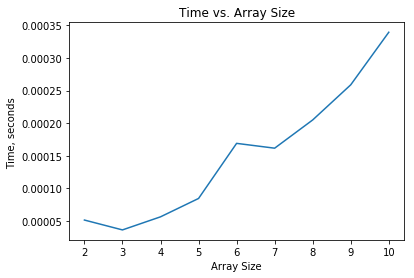

In [16]:
plotTime(size)